# 01 Data Description

This notebook provides an initial exploration of the smart meter dataset.  
We inspect data types, validate assumptions and generate a summary for downstream modeling.

**Important:** All cells marked with "NOTE" are hints for later processing steps

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Optional: widen the column width and overall display width
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 0)

In [3]:
df: pd.DataFrame = pd.read_csv('../data/raw/smart_meter_data.csv')
df.head()

/var/folders/0z/26cwjfqx4fj73hndqg4mkgl80000gn/T/ipykernel_85137/2606587072.py:1: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df: pd.DataFrame = pd.read_csv('../data/raw/smart_meter_data.csv')


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [4]:
# NOTE: in cleaning, set column names to camel_case
# NOTE: time in Unix, note datetime format

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

**Data Description**

| Feature               | Datatype | Description                                                |
|-----------------------|----------|------------------------------------------------------------|
| time                  | object   | Timestamp of the observation                               |
| use [kW]              | float64  | Total electricity consumption in kilowatts                 |
| gen [kW]              | float64  | Electricity generation from solar or other sources [kW]    |
| House overall [kW]    | float64  | Redundant copy of `use [kW]`, likely same total usage      |
| Dishwasher [kW]       | float64  | Power usage by dishwasher [kW]                             |
| Furnace 1 [kW]        | float64  | Power usage by first furnace unit [kW]                     |
| Furnace 2 [kW]        | float64  | Power usage by second furnace unit [kW]                    |
| Home office [kW]      | float64  | Power usage in home office [kW]                            |
| Fridge [kW]           | float64  | Power usage by fridge [kW]                                 |
| Wine cellar [kW]      | float64  | Power usage by wine cellar cooling unit [kW]               |
| Garage door [kW]      | float64  | Power usage by garage door mechanism [kW]                  |
| Kitchen 12 [kW]       | float64  | Appliance in kitchen zone 12, likely a plug meter [kW]     |
| Kitchen 14 [kW]       | float64  | Appliance in kitchen zone 14, likely a plug meter [kW]     |
| Kitchen 38 [kW]       | float64  | Appliance in kitchen zone 38, likely a plug meter [kW]     |
| Barn [kW]             | float64  | Power usage in barn or external unit [kW]                  |
| Well [kW]             | float64  | Power usage of well pump or water system [kW]              |
| Microwave [kW]        | float64  | Power usage by microwave [kW]                              |
| Living room [kW]      | float64  | Power usage in living room [kW]                            |
| Solar [kW]            | float64  | Solar panel generation data [kW] (matches `gen [kW]`)      |
| temperature           | float64  | Ambient temperature, likely in Fahrenheit                  |
| icon                  | object   | Weather condition icon identifier                          |
| humidity              | float64  | Relative humidity (0–1 range)                              |
| visibility            | float64  | Visibility in miles or km (depends on source)              |
| summary               | object   | Textual weather summary (e.g., "Partly Cloudy")            |
| apparentTemperature   | float64  | Feels-like temperature, likely in Fahrenheit               |
| pressure              | float64  | Atmospheric pressure in hPa                                |
| windSpeed             | float64  | Wind speed in mph or m/s                                   |
| cloudCover            | object   | Cloud coverage category (e.g., "Clear", "Overcast")        |
| windBearing           | float64  | Wind direction in degrees (0–360)                          |
| precipIntensity       | float64  | Precipitation intensity (in/hr or mm/hr)                   |
| dewPoint              | float64  | Dew point temperature in Fahrenheit                        |
| precipProbability     | float64  | Probability of precipitation (0–1 range)                   |

In [6]:
def summarize_numeric_columns_with_missing_and_outliers(input_dataframe: DataFrame) -> DataFrame:
    """
    Generate summary statistics for all numeric columns including missing values and outlier counts.
    """
    numeric_columns_dataframe: DataFrame = input_dataframe.select_dtypes(include='number')
    transposed_description: DataFrame = numeric_columns_dataframe.describe().T

    missing_values_total: Series = numeric_columns_dataframe.isna().sum()
    missing_values_percentage: Series = (missing_values_total / len(numeric_columns_dataframe)) * 100

    first_quartile: Series = numeric_columns_dataframe.quantile(0.25)
    third_quartile: Series = numeric_columns_dataframe.quantile(0.75)
    interquartile_range: Series = third_quartile - first_quartile

    outlier_condition: DataFrame = (
        (numeric_columns_dataframe < (first_quartile - 1.5 * interquartile_range)) |
        (numeric_columns_dataframe > (third_quartile + 1.5 * interquartile_range))
    )
    outlier_count_per_column: Series = outlier_condition.sum()

    transposed_description['missing'] = missing_values_total
    transposed_description['missing_percent'] = missing_values_percentage
    transposed_description['outliers'] = outlier_count_per_column

    return transposed_description

In [7]:
summarize_numeric_columns_with_missing_and_outliers(df)

,count,mean,std,min,25%,50%,75%,max,missing,missing_percent,outliers
use [kW],503910.0,0.858962,1.058207,0.000000,0.367667,0.562333,0.970250,14.714567,1,0.000198,34211
gen [kW],503910.0,0.076229,0.128428,0.000000,0.003367,0.004283,0.083917,0.613883,1,0.000198,81108
House overall [kW],503910.0,0.858962,1.058207,0.000000,0.367667,0.562333,0.970250,14.714567,1,0.000198,34211
Dishwasher [kW],503910.0,0.031368,0.190951,0.000000,0.000000,0.000017,0.000233,1.401767,1,0.000198,29545
Furnace 1 [kW],503910.0,0.099210,0.169059,0.000017,0.020233,0.020617,0.068733,1.934083,1,0.000198,89810
Furnace 2 [kW],503910.0,0.136779,0.178631,0.000067,0.064400,0.066633,0.080633,0.794933,1,0.000198,85094
Home office [kW],503910.0,0.081287,0.104466,0.000083,0.040383,0.042217,0.068283,0.971750,1,0.000198,68888
Fridge [kW],503910.0,0.063556,0.076199,0.000067,0.005083,0.005433,0.125417,0.851267,1,0.000198,3207
Wine cellar [kW],503910.0,0.042137,0.057967,0.000017,0.007133,0.008083,0.053192,1.273933,1,0.000198,113183
Garage door [kW],503910.0,0.014139,0.014292,0.000017,0.012733,0.012933,0.013100,1.088983,1,0.000198,44137


NOTE:
- Use and generation are mostly low, but some devices spike (e.g. 14.7 kW usage, >2 kW for small appliances)
- Every column has exactly 1 missing value (probably only one row)
- Outliers are everywhere: 34k+ in total usage, 113k+ in the wine cellar column.. could be legit or noise
- `temperature` ranges from -12.6 to 93.7, probably in Fahrenheit
- `humidity` and `wind bearing` look clean with zero outliers
- `precipIntensity` and `precipProbability` are mostly zero, probably not that useful
- Some appliance readings are tiny (e.g. 0.000017 kW), maybe idle states or sensor jitter

In [8]:
# Value conts of all non-numeric columns except time
_ = [print(df[c].value_counts(dropna=False), '\n') for c in df.select_dtypes(include='object') if c != 'time']

icon
clear-night            194536
clear-day              182252
rain                    43081
partly-cloudy-day       39492
partly-cloudy-night     27324
snow                     7550
cloudy                   6041
wind                     2660
fog                       974
NaN                         1
Name: count, dtype: int64 

summary
Clear                       376730
Partly Cloudy                62268
Light Rain                   27368
Drizzle                      10370
Overcast                      6041
Rain                          5169
Mostly Cloudy                 4548
Light Snow                    4323
Flurries                      1789
Breezy                        1561
Snow                          1152
Breezy and Partly Cloudy      1041
Foggy                          974
Rain and Breezy                174
Heavy Snow                     171
Flurries and Breezy            115
Breezy and Mostly Cloudy        58
Dry                             58
NaN                          

NOTE: 
- `icon` and `summary` are both weather descriptors.. similar info in different formats (Likely redundant)
- `icon` has low cardinality and consistent formatting, might be good for encoding
- `summary is messy and has quite a lot of similar categories (e.g., “Light Rain” vs “Rain”). Maybe solved grouping or normalization
- `cloudCover` is stored as object but looks numeric: should be cast to float
- Some `cloudCover` values are clearly string duplicates of float values (e.g. 0.75 vs 0.75 )
- All three columns have exactly one missing value: irrelevant for imputation but should be handled consistently

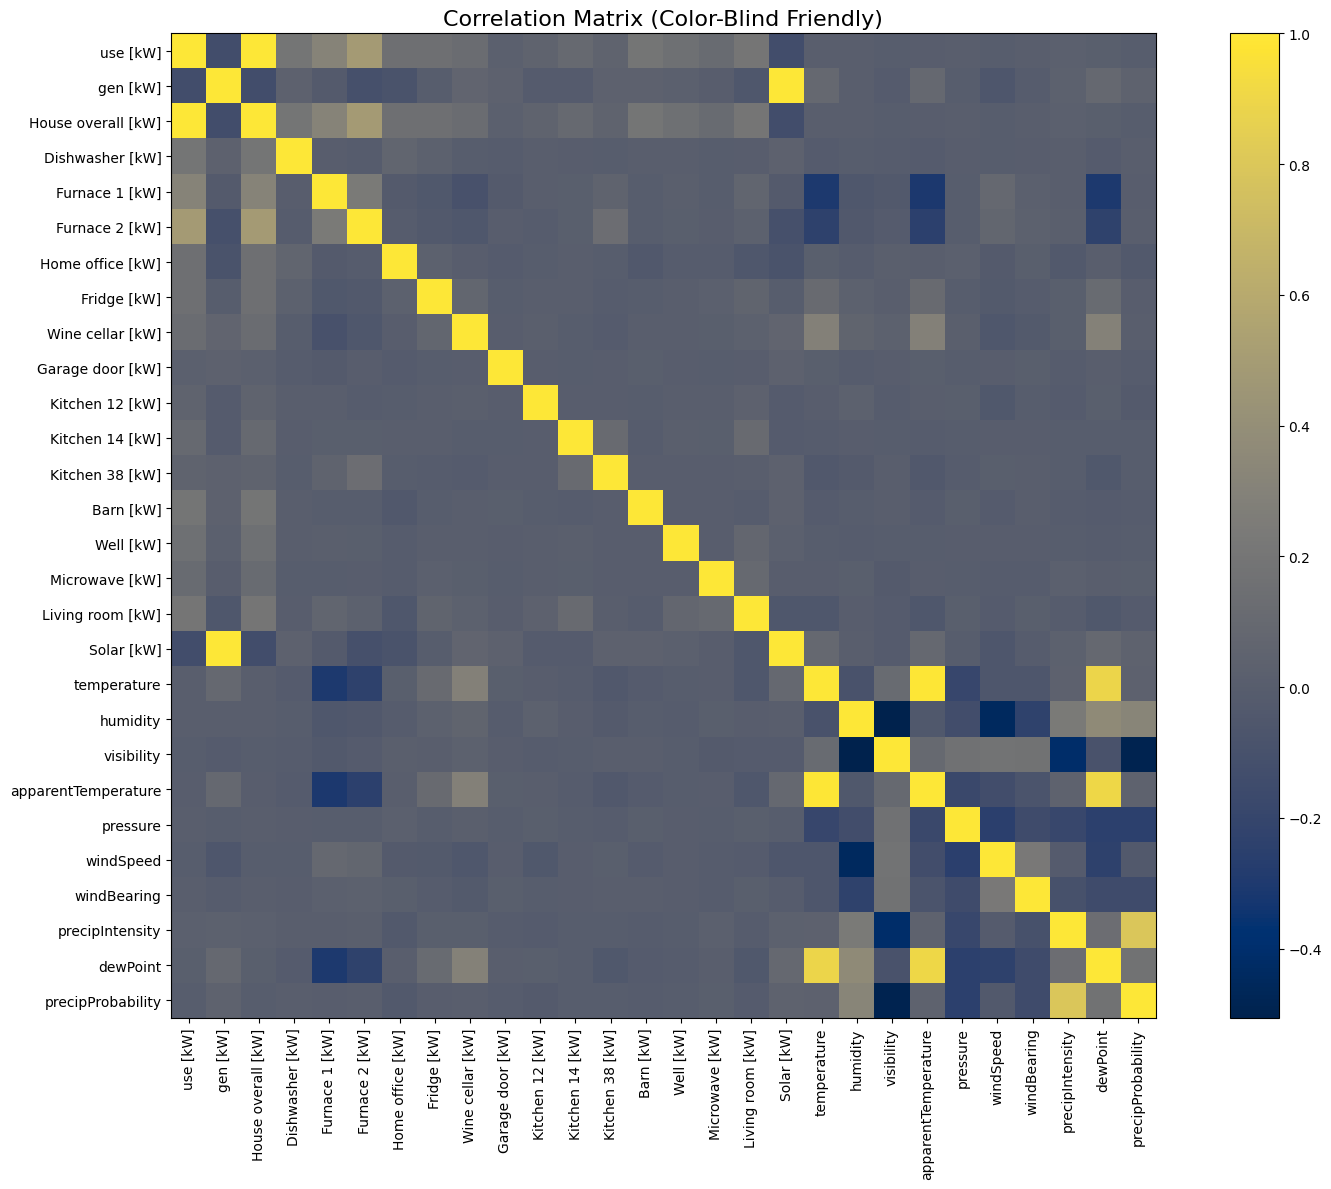

In [9]:
numeric_columns: pd.DataFrame = df.select_dtypes(include='number')

correlation_matrix: pd.DataFrame = numeric_columns.corr()

plt.figure(figsize=(16, 12))
heatmap = plt.imshow(correlation_matrix, cmap='cividis', interpolation='nearest')
plt.colorbar(heatmap)
plt.title('Correlation Matrix (Color-Blind Friendly)', fontsize=16)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.tight_layout()
plt.show()

NOTE:
- `use [kW]` and `House overall [kW]` are perfectly correlated, one should be dropped
- `gen [kW]` and `Solar [kW]` are identical, keep only one
- `Furnace 2` shows the strongest correlation with total usage
- `Dishwasher`, `Living room`, `Barn`, and `Home office` have moderate correlation with `use [kW]`
- Small appliances like `Microwave`, `Garage door`, and kitchen zones are weakly correlated with total usage
- `temperature`, `apparentTemperature`, and `dewPoint` are highly correlated and likely redundant
- `precipIntensity` and `precipProbability` are strongly correlated and may be reduced to a single feature
- `humidity` is moderately linked to other weather variables but unrelated to power usage
- `windSpeed`, `windBearing`, and `pressure` have weak correlation with both power and weather variables
- Most features are weakly correlated, suggesting low multicollinearity and potential for independent effects in modeling

In [10]:
def plot_feature_distributions(numeric_dataframe: DataFrame) -> None:
    """
    Plot the distribution of each numeric feature using histograms with KDE overlays.
    """
    numeric_feature_names: list[str] = numeric_dataframe.columns.tolist()
    total_features: int = len(numeric_feature_names)
    number_of_columns: int = 5
    number_of_rows: int = -(-total_features // number_of_columns)  # Ceiling division

    figure_width: int = 5 * number_of_columns
    figure_height: int = 3 * number_of_rows
    plt.figure(figsize=(figure_width, figure_height))

    for feature_index, feature_name in enumerate(numeric_feature_names):
        plt.subplot(number_of_rows, number_of_columns, feature_index + 1)
        sns.histplot(numeric_dataframe[feature_name], bins=30, kde=True, color="steelblue", edgecolor="black")
        plt.title(feature_name, fontsize=9)
        plt.xlabel('')
        plt.ylabel('')

    plt.tight_layout()
    plt.show()

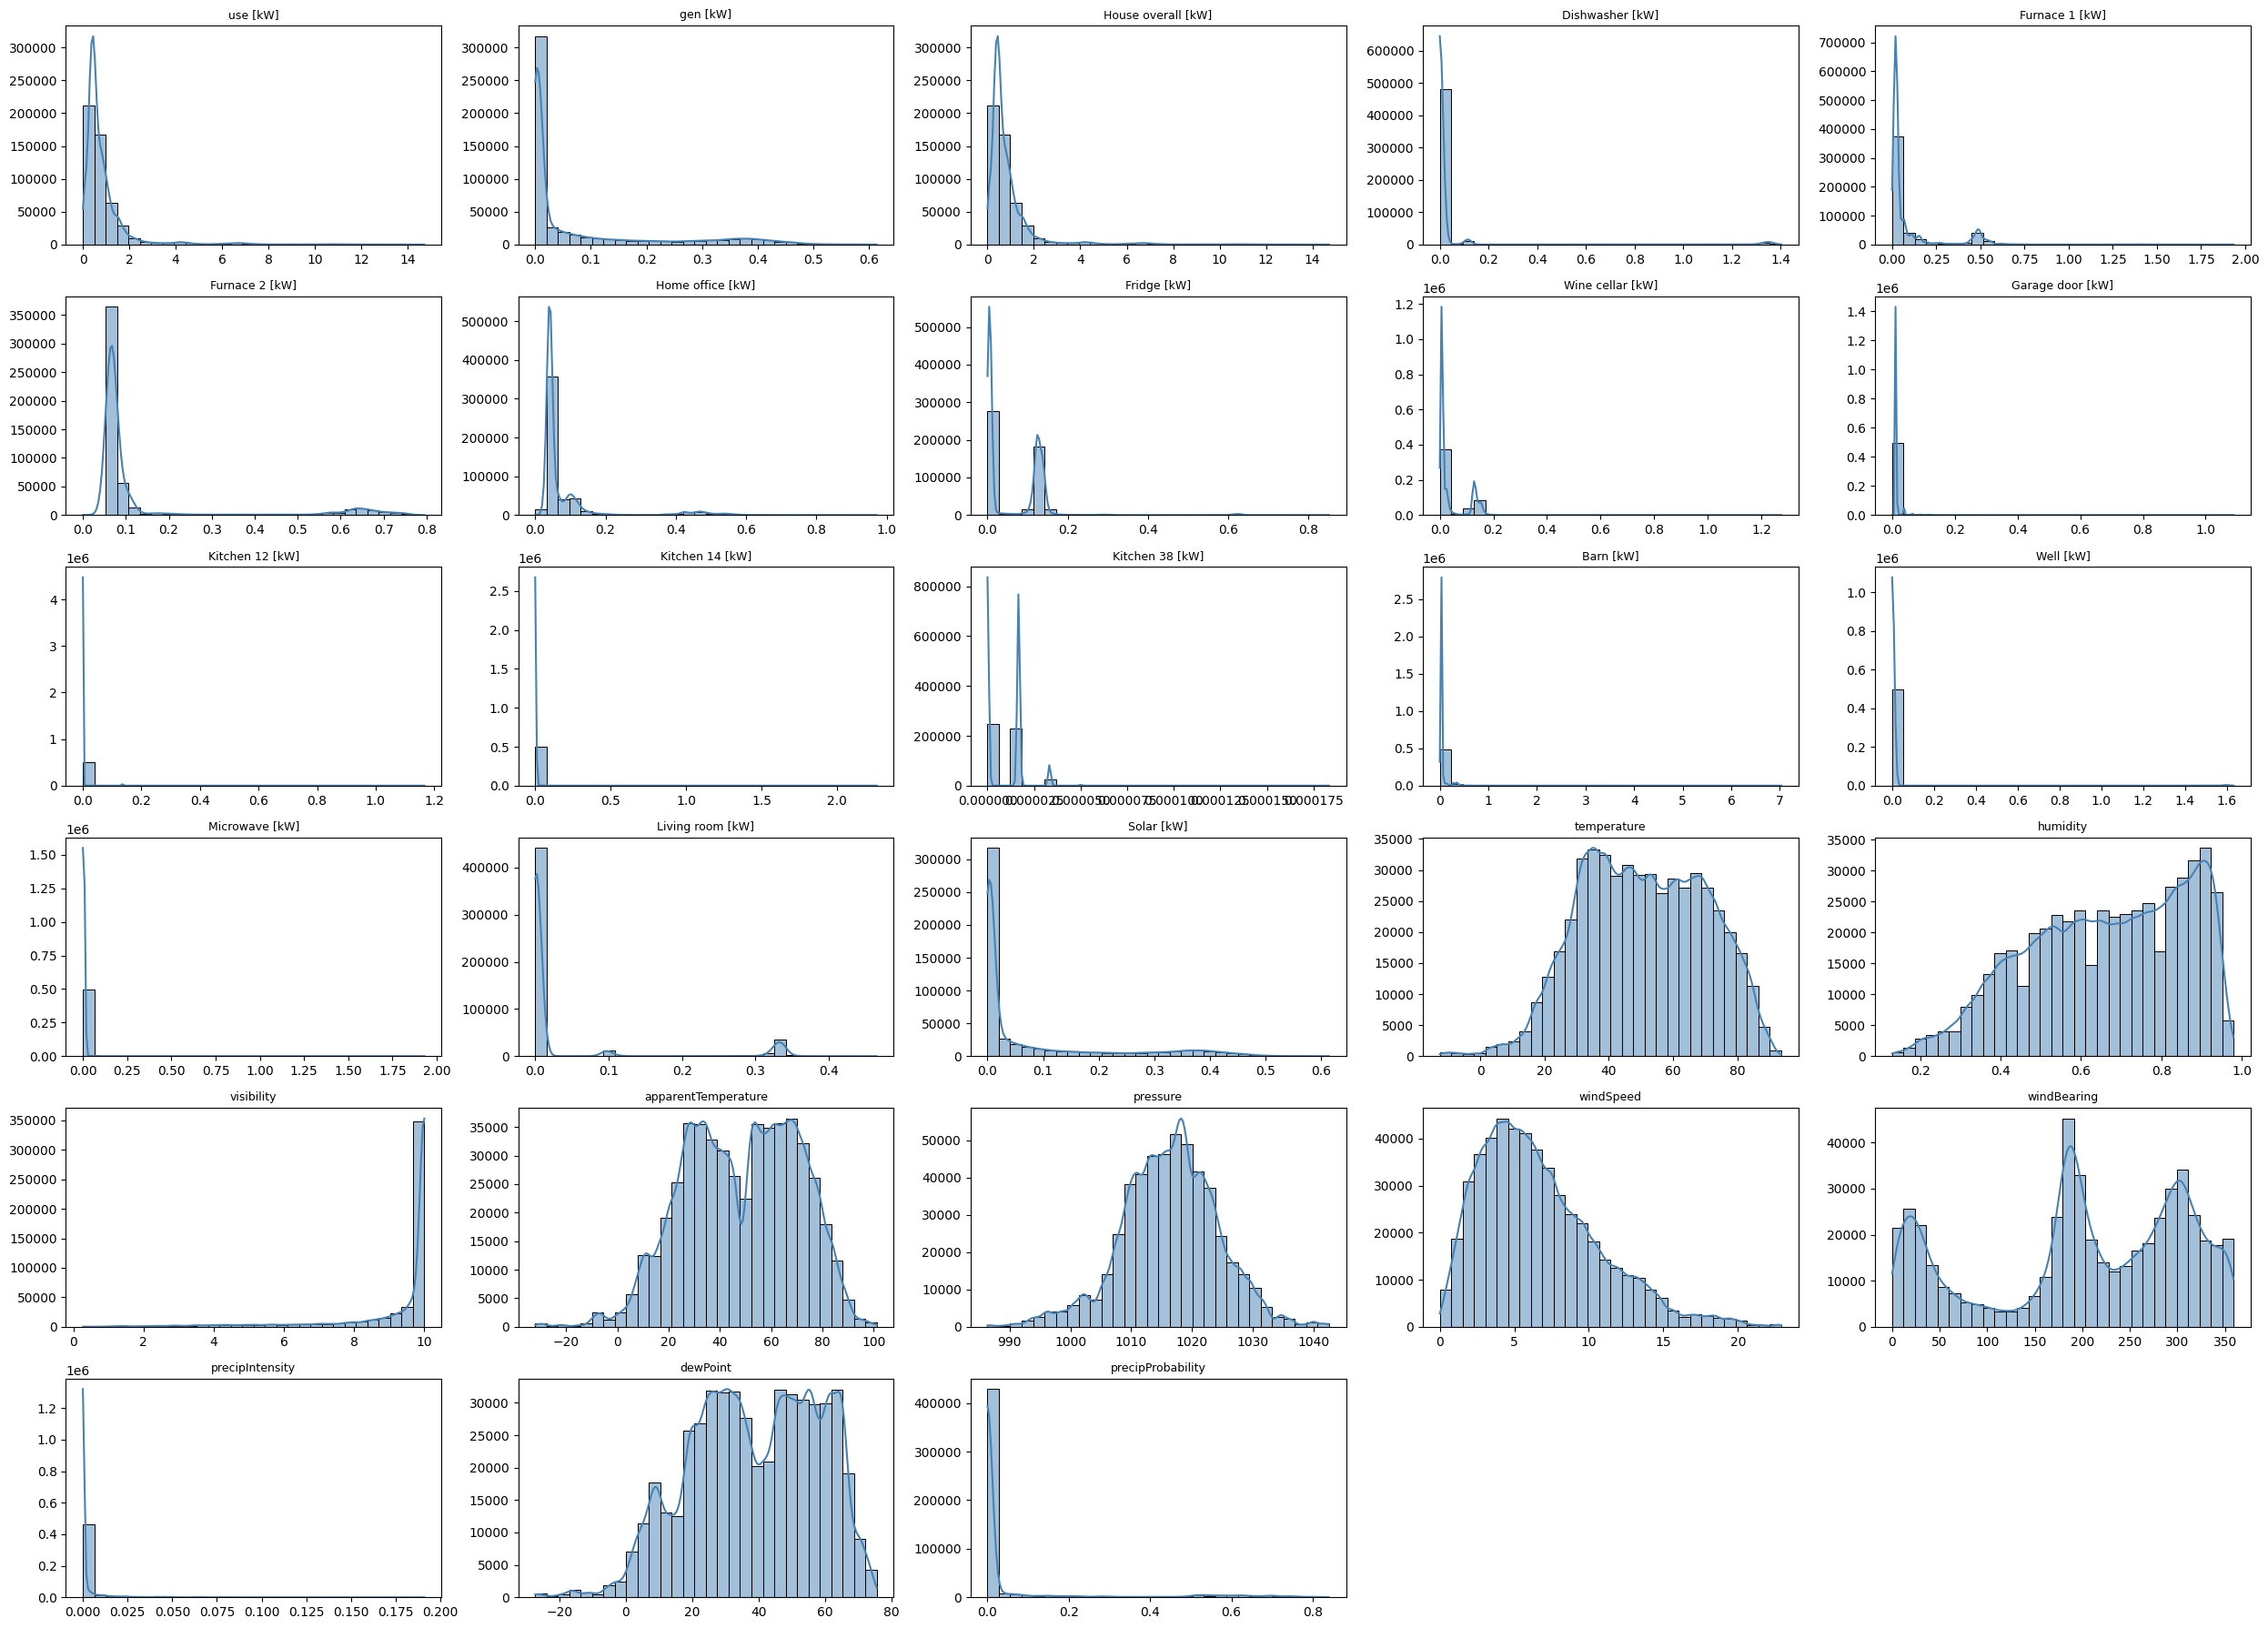

In [11]:
numeric_features_dataframe: DataFrame = df.select_dtypes(include='number')
plot_feature_distributions(numeric_features_dataframe)

Some of these features are skewed; normalization might be needed depending on the algorithm choice (e.g. LSTM)